# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import sem

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
df = pd.merge(mouse_metadata, study_results, on = ["Mouse ID"])


# Display the data table for preview
df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
total_mice = len(df["Mouse ID"].unique())
total_mice

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicates = df.duplicated(subset= ["Mouse ID", "Timepoint"])
df[duplicates]


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID.
bad_mouse = df.loc[df["Mouse ID"] == "g989"]
bad_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df = df.drop(bad_mouse.index)
clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
total_clean_mice = len( clean_df["Mouse ID"].unique())
total_clean_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
drug_mean = clean_df.groupby(clean_df["Drug Regimen"])["Tumor Volume (mm3)"].mean()
drug_median = clean_df.groupby(clean_df["Drug Regimen"])["Tumor Volume (mm3)"].median()
drug_var = clean_df.groupby(clean_df["Drug Regimen"])["Tumor Volume (mm3)"].var()
drug_std_dev = clean_df.groupby(clean_df["Drug Regimen"])["Tumor Volume (mm3)"].std()
drug_std_err = clean_df.groupby(clean_df["Drug Regimen"])["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
drug_summary_df = pd.DataFrame({"Mean Tumor Volume" : drug_mean,
                   "Median Tumor Volume" : drug_median,
                   "Tumor Volume Variance" : drug_var,
                   "Tumor Volume Std. Dev." : drug_std_dev,
                   "Tumor Volume Std. Err." : drug_std_err})
drug_summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby(clean_df["Drug Regimen"]).agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

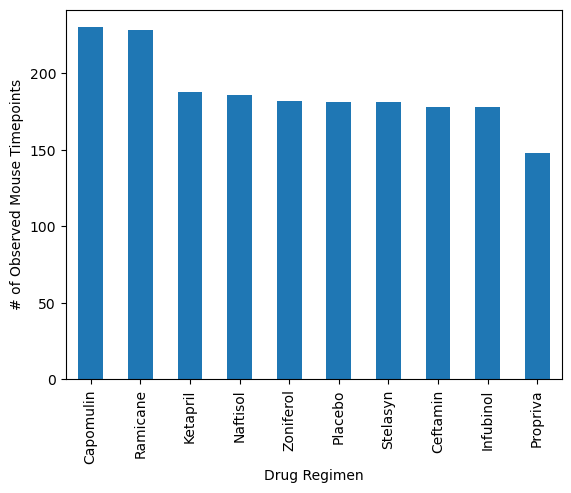

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints = clean_df.groupby("Drug Regimen").size().sort_values(ascending = False)
timepoints.plot(kind = "bar", xlabel = "Drug Regimen", ylabel = "# of Observed Mouse Timepoints")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'Ramicane'),
  Text(1, 0, 'Capomulin'),
  Text(2, 0, 'Infubinol'),
  Text(3, 0, 'Placebo'),
  Text(4, 0, 'Ceftamin'),
  Text(5, 0, 'Stelasyn'),
  Text(6, 0, 'Zoniferol'),
  Text(7, 0, 'Ketapril'),
  Text(8, 0, 'Propriva'),
  Text(9, 0, 'Naftisol')])

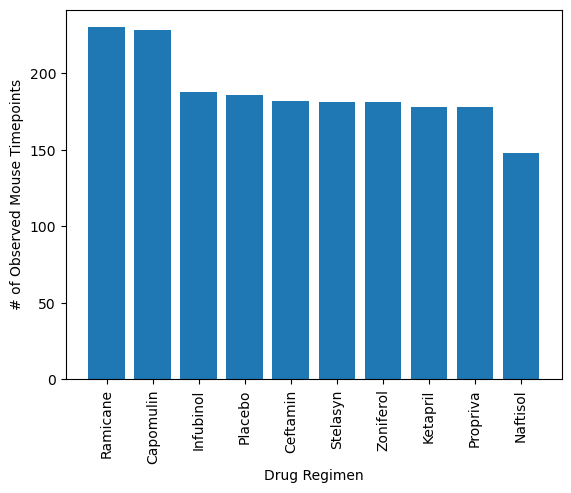

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_time_df = clean_df[["Drug Regimen", "Timepoint"]]

drugs = drug_time_df["Drug Regimen"].unique()
times = drug_time_df["Drug Regimen"].value_counts()

plt.bar(drugs, times)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")
plt.xticks(rotation = 90)

<Axes: >

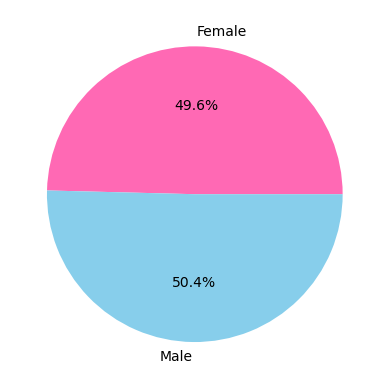

In [11]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_sex_df = clean_df[["Mouse ID", "Sex"]].drop_duplicates(subset = "Mouse ID")

# Make the pie chart
sexes = mice_sex_df.groupby("Sex").size()
sexes.plot(kind = "pie", autopct="%1.1f%%", colors = ["hotpink", "skyblue"])


Text(0, 0.5, 'count')

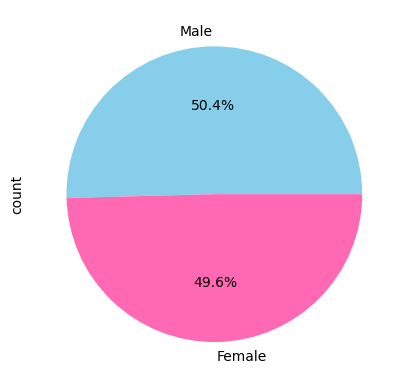

In [12]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
male = mice_sex_df.loc[mice_sex_df["Sex"] == "Male"]["Sex"].count()
female = mice_sex_df.loc[mice_sex_df["Sex"] == "Female"]["Sex"].count()
sexes = [male, female]
labels = ["Male", "Female"]
colors = ["skyblue", "hotpink"]

# Make the pie chart
plt.pie(sexes, labels = labels, autopct="%1.1f%%", colors = colors)
plt.ylabel("count")

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin
top_drugs = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_df = clean_df[clean_df["Drug Regimen"].isin(top_drugs)]
final_df

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = final_df.groupby('Mouse ID')['Timepoint'].max().reset_index()
last_timepoint

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tumor_df = pd.merge(last_timepoint, clean_df, on = ["Mouse ID", "Timepoint"])
tumor_df

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a275,45,Ceftamin,Female,20,28,62.999356,3
3,a411,45,Ramicane,Male,3,22,38.407618,1
4,a444,45,Ramicane,Female,10,25,43.047543,0
...,...,...,...,...,...,...,...,...
95,y769,45,Ceftamin,Female,6,27,68.594745,4
96,y793,45,Capomulin,Male,17,17,31.896238,2
97,y865,45,Ceftamin,Male,23,26,64.729837,3
98,z578,45,Ramicane,Male,11,16,30.638696,0


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# top_drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'] - already have this from previous cell

# Create empty list to fill with tumor vol data (for plotting)
tumor_volume = []

# Calculate the IQR and quantitatively determine if there are any potential outliers.

    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in top_drugs:
    tumors = tumor_df.loc[tumor_df["Drug Regimen"] == drug]
    quartiles = tumors["Tumor Volume (mm3)"].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset
    tumor_volume.append(tumors["Tumor Volume (mm3)"])

    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumors["Tumor Volume (mm3)"][(tumors["Tumor Volume (mm3)"] < lower_bound) | (tumors["Tumor Volume (mm3)"] > upper_bound)]
    print(f"{drug}'s potential outliers: {outliers}")


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


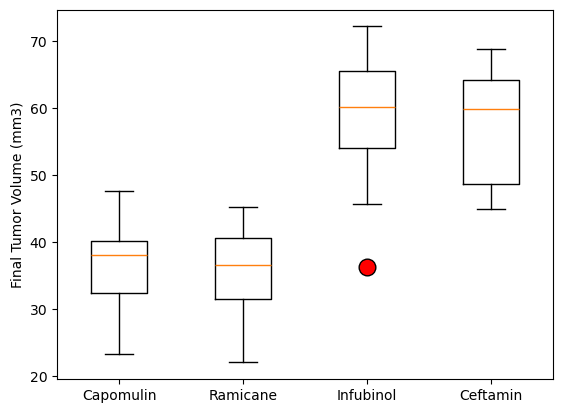

In [15]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
fig, ax1 = plt.subplots()

flierprops = dict(marker="o", markerfacecolor='r', markersize=12)

ax1.boxplot(tumor_volume, flierprops = flierprops)
plt.xticks([1, 2, 3, 4], top_drugs)
ax1.set_ylabel("Final Tumor Volume (mm3)")

plt.show()


## Line and Scatter Plots

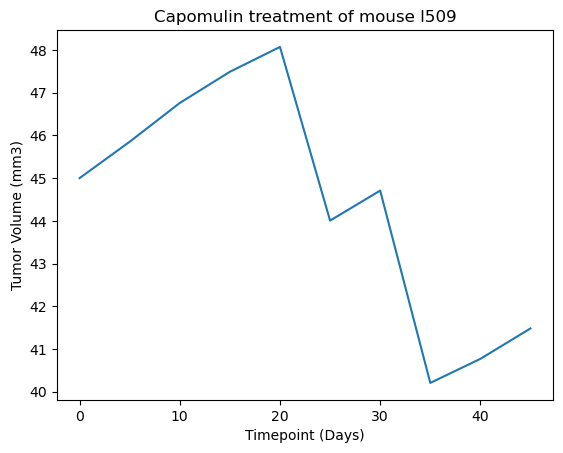

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mickey = clean_df.loc[clean_df["Mouse ID"] == "l509"]
x_axis = mickey["Timepoint"]
y_axis = mickey["Tumor Volume (mm3)"]
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.plot(x_axis, y_axis)


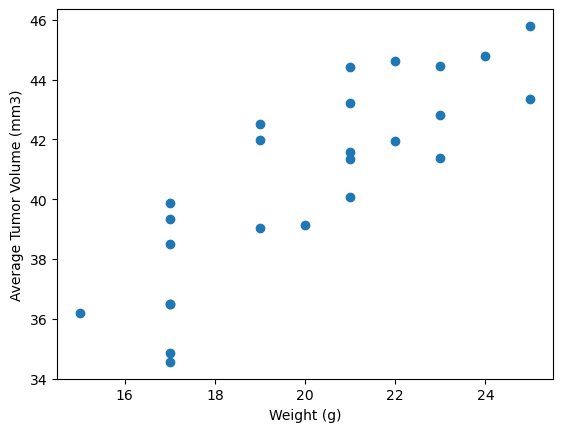

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
cap_df = clean_df.loc[clean_df["Drug Regimen"] == "Capomulin"]
volume_mean = cap_df.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
weights = cap_df.groupby("Mouse ID")["Weight (g)"].unique()
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.scatter(weights, volume_mean)

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


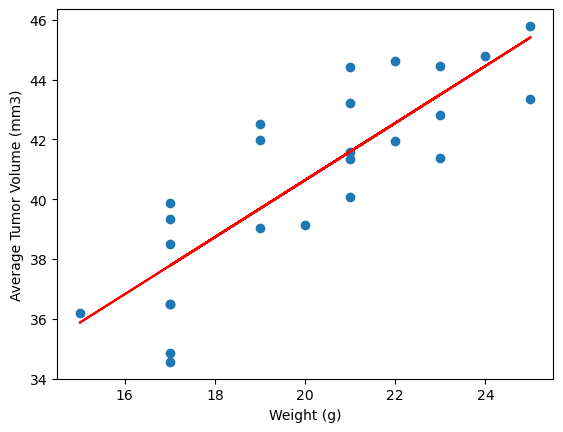

In [18]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

weights_val = cap_df.groupby("Mouse ID")["Weight (g)"].mean()

correlation, _ = st.pearsonr(weights, volume_mean)

print(f"The correlation between mouse weight and the average tumor volume is {correlation[0]:.2f}")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

slope, int, rval, pval, std_err = st.linregress(weights_val, volume_mean)
regress_values = weights_val * slope + int
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(int,2))

plt.plot(weights_val,regress_values,"r-")
plt.scatter(weights, volume_mean)
plt.show()